In [1]:
import pandas as pd
%pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('/Users/kangnamw/Desktop/대학원/졸업/논문/forcode_data2.csv')

y = df['HTC']

X = df.drop('HTC', axis=1)

In [3]:
for col in X.select_dtypes(include=['object']):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [5]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
params = {'objective': 'regression', 'metric': 'mean_squared_error', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05}
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[val_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 655, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12318.429088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [6]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 7674642.9347608015


In [10]:
train_mse = []
val_mse = []
for i in range(5):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[val_data])
    y_pred = model.predict(X_val)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    val_mse.append(mean_squared_error(y_val, y_pred))
print('Train MSE:', np.mean(train_mse))
print('Validation MSE:', np.mean(val_mse))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 655, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12290.283409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [12]:
# Calculate RMSE for training set
train_mse = mean_squared_error(y_train, model.predict(X_train))
print('Train MSE:', train_mse)

# Calculate RMSE for validation set
val_mse = mean_squared_error(y_val, model.predict(X_val))
print('Validation MSE:', val_mse)

# Calculate RMSE for test set
test_mse = mean_squared_error(y_test, model.predict(X_test))
print('Test MSE:', test_mse)

Train MSE: 3820440.4728478743
Validation MSE: 4238457.411645167
Test MSE: 6450007.784925983


In [16]:
y_true1 = y_val
y_pred1 = model.predict(X_val)

y_true2 = y_test
y_pred2 = model.predict(X_test)

# MSE 계산
mse1 = np.mean((np.array(y_true1) - np.array(y_pred1)) ** 2)
mse2 = np.mean((np.array(y_true2) - np.array(y_pred2)) ** 2)

# RMSE 계산
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

print("Valid_RMSE:", rmse1)
print("Test_RMSE:", rmse2)

Valid_RMSE: 2058.7514205569273
Test_RMSE: 2539.686552495403


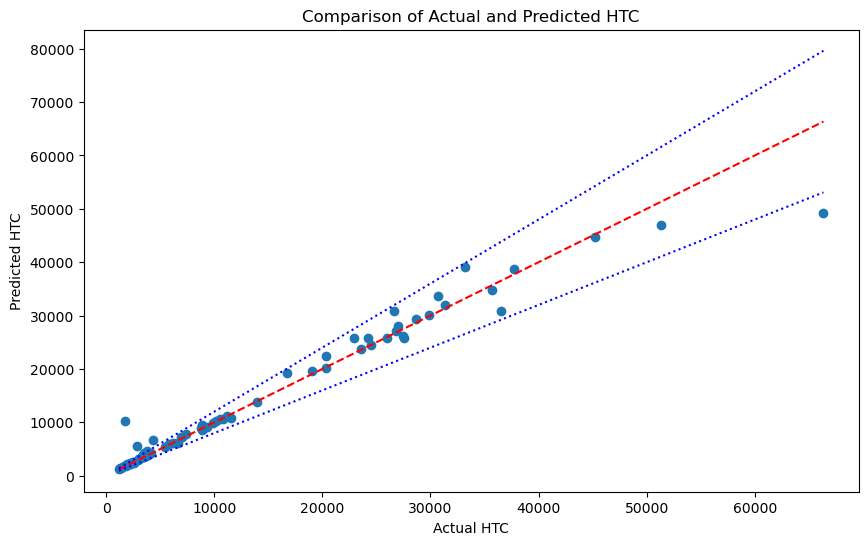

In [15]:
import matplotlib.pyplot as plt
# Make predictions on the test data
y_pred = model.predict(X_test)

upper_margin = y_test * 1.20  # 10% upper margin
lower_margin = y_test * 0.80  # 10% lower margin

# Compare predicted and actual HTC values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.plot([min(y_test), max(y_test)], [min(lower_margin), max(lower_margin)], 'b:', label='20% Lower Margin')
plt.plot([min(y_test), max(y_test)], [min(upper_margin), max(upper_margin)], 'b:', label='20% Upper Margin')
plt.xlabel('Actual HTC')
plt.ylabel('Predicted HTC')
plt.title('Comparison of Actual and Predicted HTC')
plt.show()